In [13]:
%pylab inline
import glob
import numpy as np
import sys
import seaborn as sns
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/joint_v_per_locus/'

Populating the interactive namespace from numpy and matplotlib


In [14]:
# PLot cdf of gamma distribution posterior estimates for real data

def main():
    print('Running main')
    
    folder = 't23'
    fig_num = 0
    pers = [2,3,4] 
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray']
    
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    subplots_dic = {}
    subplots_dic[2] = [(3,4,1),(3,4,2),(3,4,3),(3,4,4),(3,4,5),(3,4,6),(3,4,7),(3,4,8),(3,4,10),(3,4,11)]
    subplots_dic[3] = [(3,3,1),(3,3,2),(3,3,3),(3,3,4),(3,3,5),(3,3,6),(3,3,7),(3,3,8),(3,3,9)]
    subplots_dic[4] = [(2,2,1),(2,2,2),(2,2,3),(2,2,4)]
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1) 
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    for per in pers:
        i = -1
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
            
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        opt_alleles = opt_dic[per]
        print('Period %d'%(per))
        fig_num = fig_num + 1
        fig = plt.figure(fig_num)
        if per != 2:
            fig.set_size_inches((15, 15))
        else:
            fig.set_size_inches((20,15))
        
        index = -1
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string) )
            
            file_list.sort() 
            base_plot = ''
            cum_dic = {}
            cum_dic_per_locus = {}
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[1])
                if num_acc > 0 and num_loci >= 10:

                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    if motif != '1.0' and motif != '0.0':
                        line = lines[11]
                        info = line.strip().split(',')
                        k = float(info[0])
                        theta = float(info[1])

                        s = [] # List of s values drawn from gamma distribution
                        num_sims = 10000
                        for i in range(0, num_sims):
                            s_val = np.random.gamma(k, theta)
                            if s_val > 0.1:
                                s_val = 0.1

                            s.append(s_val)

                        bins_list = [0]
                        exponents = [10**-5, 10**-4, 10**-3, 10**-2]
                        for j in exponents:
                            for i in np.arange(1,10,0.01):
                                bins_list.append(i*j)

                        bins_list.append(0.1)
                        bins_list.append(1)

                        values, base = np.histogram(s, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
                        
                        cumulative = list(np.cumsum(values))
                        maximum = max(cumulative)
                        cumulative_scaled = []
                        for elem in cumulative:
                            elem = elem/maximum
                            cumulative_scaled.append(elem)
                       
                        cum_dic[(motif, opt_allele, num_loci)] = cumulative_scaled
                        base_plot = base
                        
                        inFile = '/storage/BonnieH/selection_project/per_locus/SISTR_results/0.005_3_0.3_yny5_eurodem_prior2_all_per_0810.txt'
                        allele_freqs_file = open(inFile, 'r')

                        header = allele_freqs_file.readline().strip()
                        s_per_locus = []
                        for line in allele_freqs_file:
                            info = line.strip().split('\t')
                            
                            mot = info[6]
                            opt = int(info[5])
                            total = int(info[3])
                            s_ABC = info[17]
                            if mot == motif and opt == opt_allele and total > 5214:
                                if s_ABC != 'N/A':
                                    s_ABC = float(s_ABC)
                                    s_per_locus.append(s_ABC)
                                    
                        allele_freqs_file.close()
                        vals, base = np.histogram(s_per_locus, bins=bins_list)# [0,10**-5,10**-4,10**-3,10**-2,10**-1,1]#[0,10**-5,10**-4,10**-3,10**-2,10**-1,1]
                        
                        cumul = list(np.cumsum(vals))
                        maximum = max(cumul)
                        cumul_scaled = []
                        for elem in cumul:
                            elem = elem/maximum
                            cumul_scaled.append(elem)
                        
                        cum_dic_per_locus[(motif, opt_allele, num_loci)] = cumul_scaled
               
            # Plot CDF
            
            index = index + 1
            ax = fig.add_subplot(subplots_dic[per][index][0],subplots_dic[per][index][1],subplots_dic[per][index][2])
            for elem in cum_dic:
                
                if elem[1] != 0:
                    
                    ax.plot(base_plot[:-1], cum_dic_per_locus[elem], label = elem[0] + ' Per-locus', color=color_dic_motif[elem[0]], linewidth = 3) #color_dic[elem[0]] color_list[color_num]
                    ax.plot(base_plot[:-1], cum_dic[elem], label = elem[0] + ' Joint', color=color_dic_motif[elem[0]], linewidth = 3, ls='dashed') # (' + str(elem[2]) + ' loci)
                    
                else:
                    ax.plot(base_plot[:-1], cum_dic[elem], label = elem[0] + ' all opt', color='black', linewidth = 3)
            
            ax.set_xlim(10**-5, 0.1)
            ax.set_xscale('log')
            ax.set_title('Distribution of s values: per_locus v joint method\n' + 'Per ' + str(per) + ' Opt allele ' + str(elem[1]))
            ax.set_xlabel('s', fontsize=15)
            ax.legend(bbox_to_anchor=(1, 1)) 
            ax.set_ylabel('Cumulative Frequency')
            
        #handles, labels = ax.get_legend_handles_labels()
        #fig.legend(handles, labels) #, 
        fig.tight_layout()
        plt.savefig(PLOTDIR + 'per_%d.pdf'%(per),bbox_inches='tight')
        plt.show()
    print('Done')

Running main
Period 2


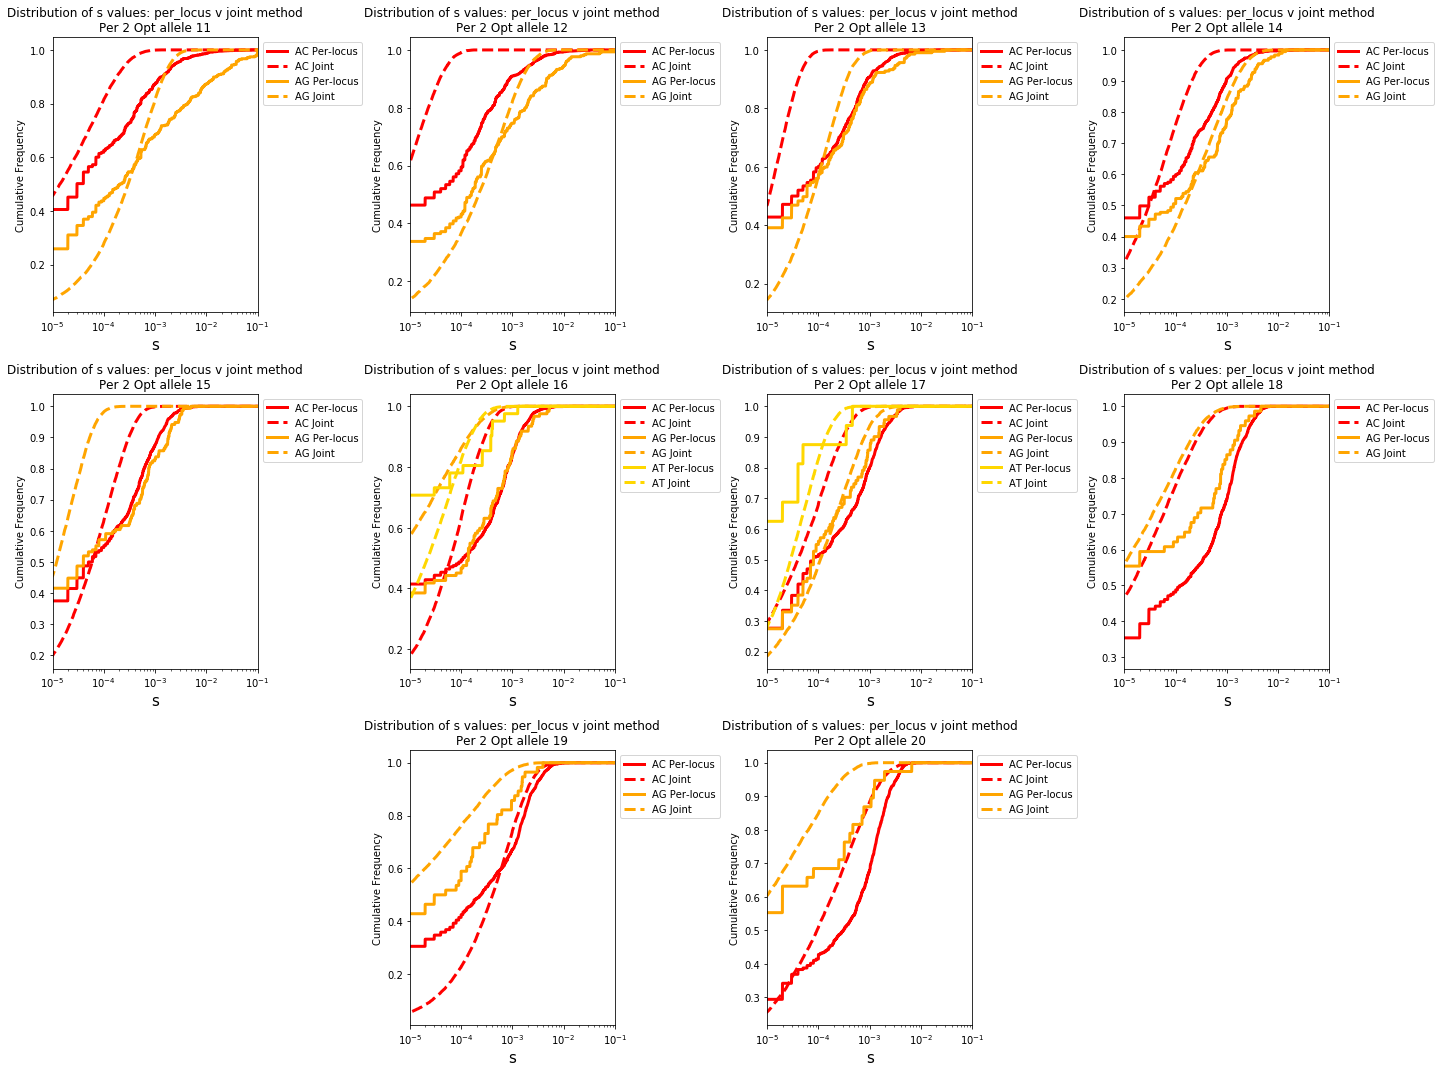

Period 3


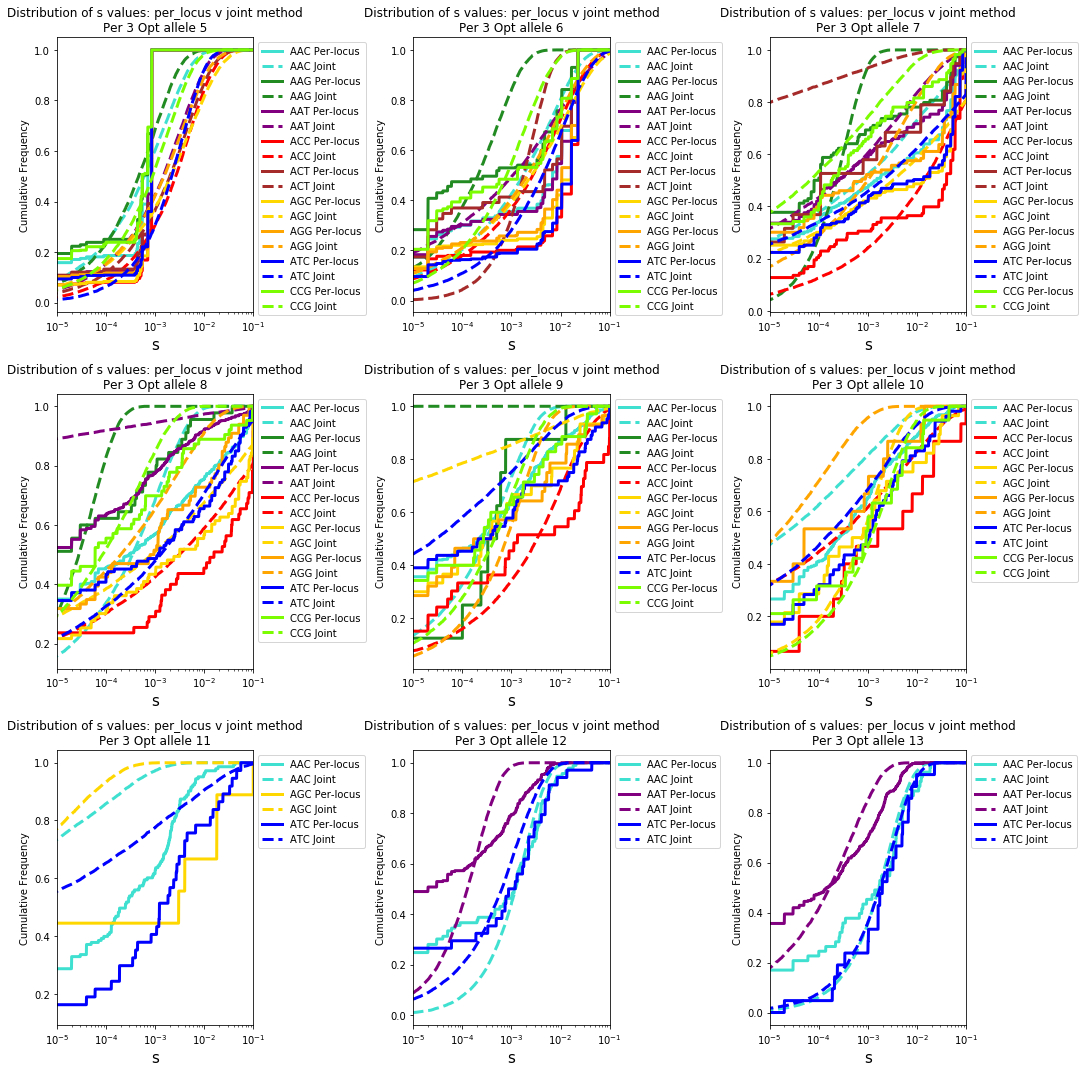

Period 4


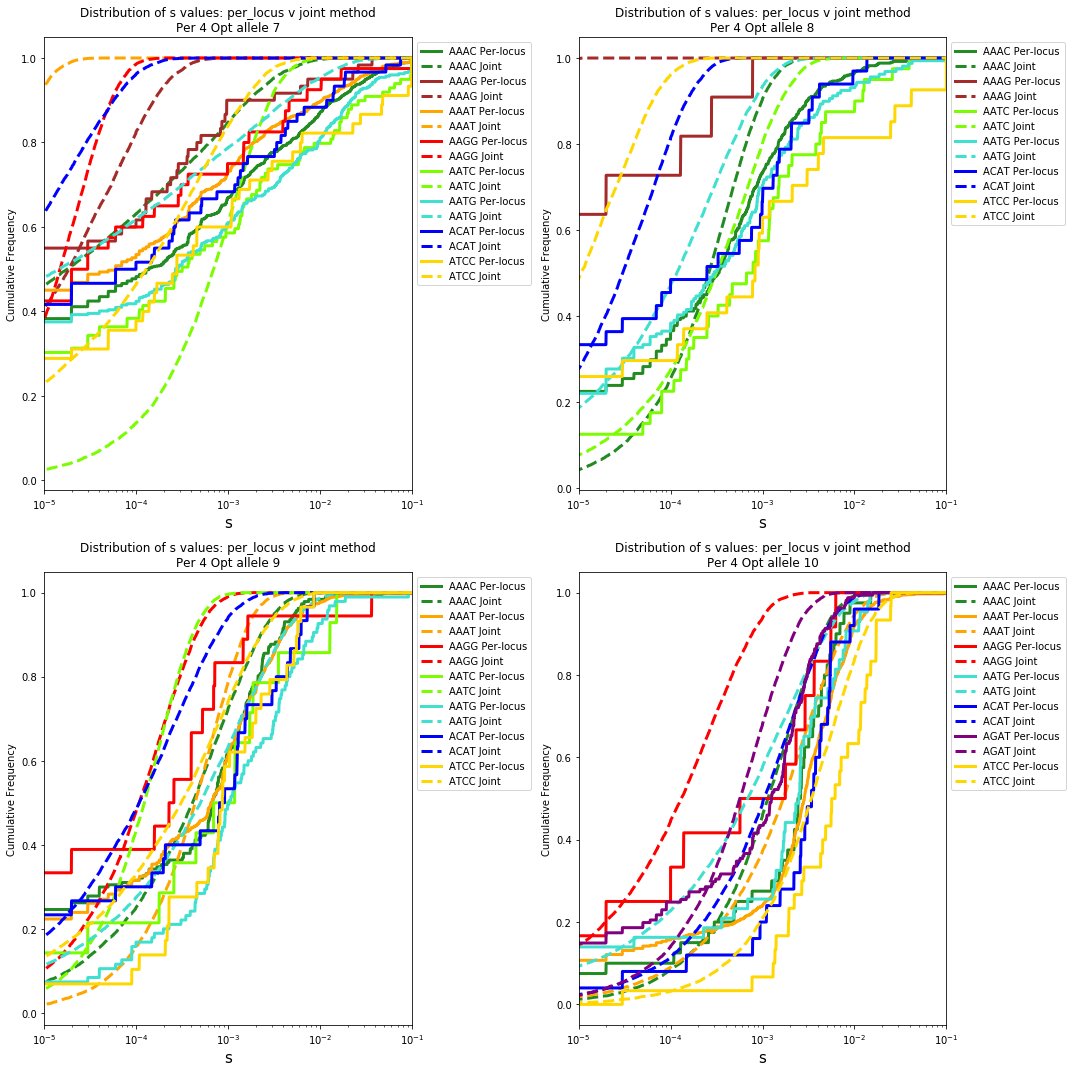

Done
CPU times: user 1min 3s, sys: 1.01 s, total: 1min 4s
Wall time: 1min 4s


In [15]:
%%time
if __name__ == '__main__':
    main()